In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
import ROOT
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from RooFitTools import ArrayToTree


OBJ: TStyle	dybStyle	Daya Bay Style : 0 at: 0x55df20812dd0
Welcome to JupyROOT 6.24/00


In [2]:
with np.load("/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/code/Spectrum_2022_5_16_Bi207.npz", allow_pickle=True) as f:
    dict_TQ_diff_source = f["dir_TQ_diff_source"].item()

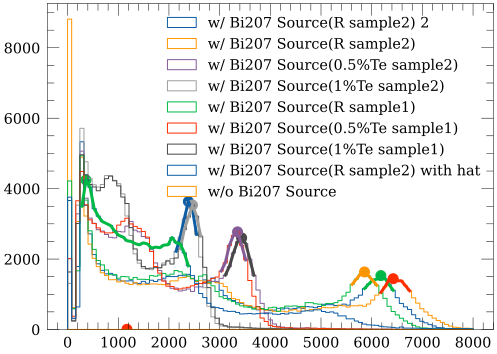

In [3]:
from HistTools import GetBinCenter
import more_itertools as mit
bins = np.linspace(0,8000,100)
bins_center = GetBinCenter(bins)
dict_x_peak = {}
for i, (key,dict_TQ) in enumerate(dict_TQ_diff_source.items()):
    v_Q = dict_TQ["Q"]
    h = plt.hist(v_Q, bins=bins,histtype="step", label=key)

    # Find rightmost peak location
    threshold = 0.5*max(h[0][bins_center>500])
    num_index = np.where(h[0]>threshold)[0]

    v_group = [list(group) for group in  mit.consecutive_groups( num_index )]
    plt.plot(bins_center[v_group[-1]],  h[0][v_group[-1]])
    index_max =  v_group[-1][np.argmax( h[0][v_group[-1]])]
    plt.scatter(bins_center[index_max], h[0][index_max])
    # break
    dict_x_peak[key] = bins_center[index_max]

plt.legend()



6424.242424242424
ERROR! Session/line number was not unique in database. History logging moved to new session 371
3434.3434343434337
2383.8383838383834
5858.585858585859
3353.5353535353534
2464.6464646464647
 **********
 **  190 **SET PRINT           1
 **********
 **********
 **  191 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         5.42424e+03  2.00000e+02    5.42424e+03  7.42424e+03
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUGHT BACK INSIDE LIMITS.
     2 sigma        1.00000e+02  4.99500e+01    1.00000e-01  5.00000e+02
 **********
 **  192 **SET ERR         0.5
 **********
 **********
 **  193 **SET PRINT           1
 **********
 **********
 **  194 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST REL

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_time_1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_time_2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_time_3
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_time_4
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_time_5
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_time_6


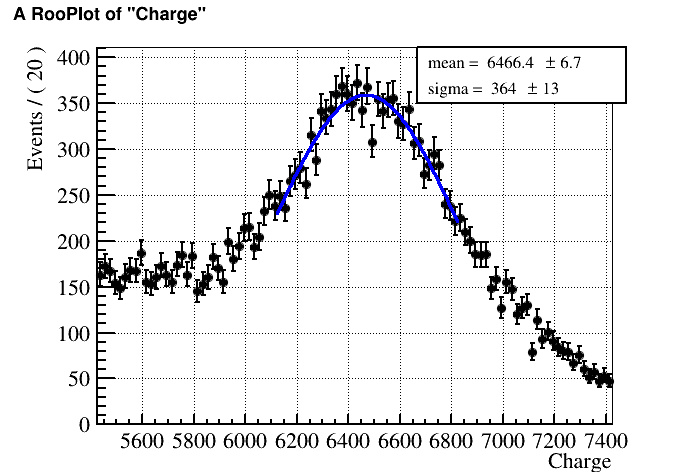

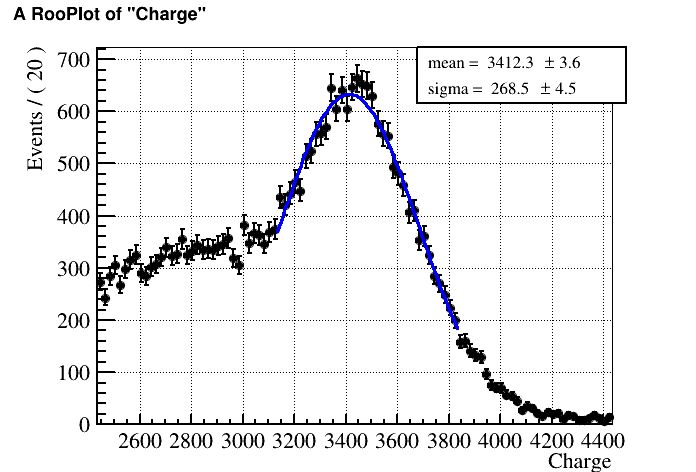

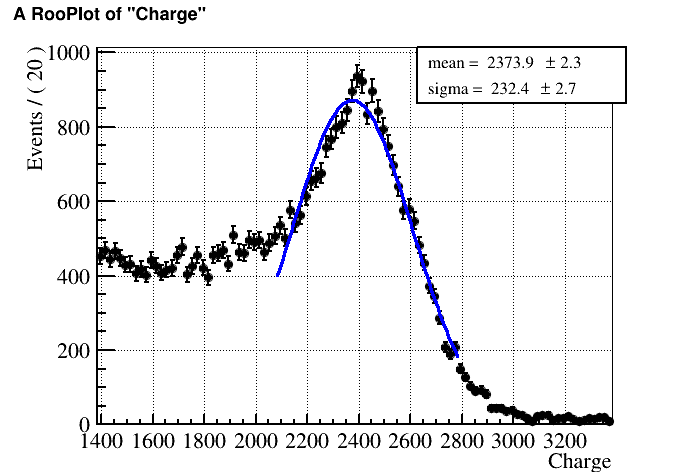

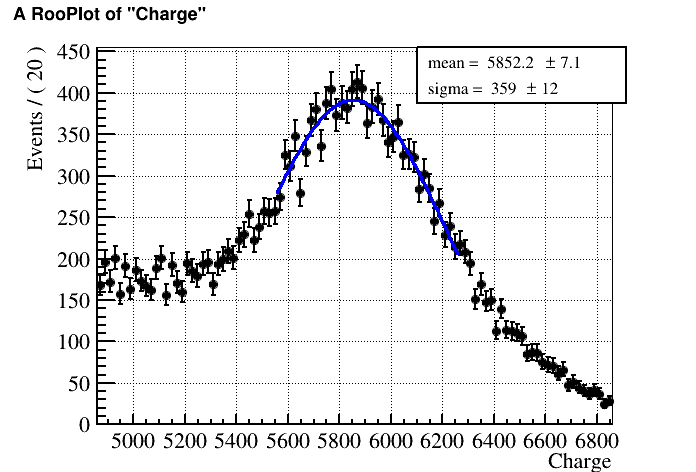

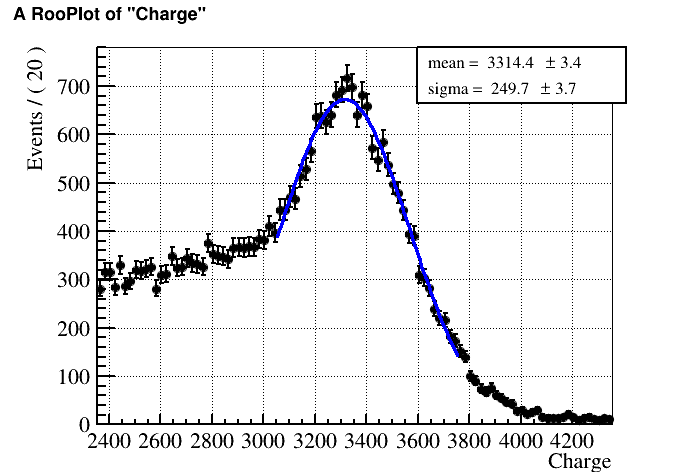

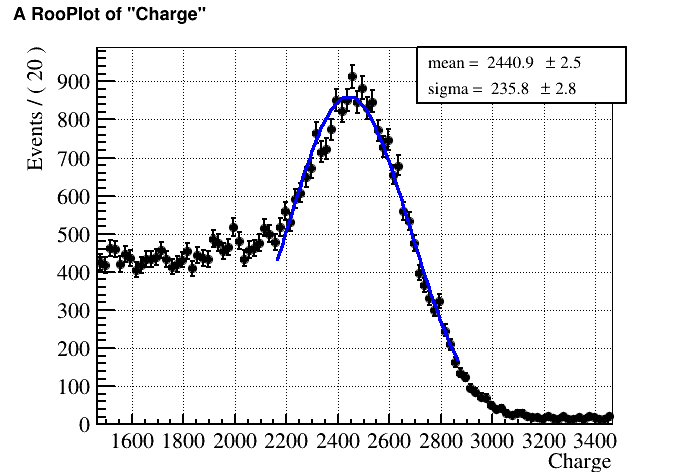

In [9]:
dict_mean = {}
dict_sigma = {}
for i, (key,dict_TQ) in enumerate(dict_TQ_diff_source.items()):
    if "w/o" in key or ") 2" in key or "with hat" in key:
        continue
    v_Q = dict_TQ["Q"][(dict_TQ["valley"]>-2)]

    print(dict_x_peak[key])
    # break
    x_min, x_max = dict_x_peak[key]-1000, dict_x_peak[key]+1000
    x = ROOT.RooRealVar("Charge", "Charge", x_min, x_max)
    mean = ROOT.RooRealVar("mean", "mean",300, x_min, x_max )
    sigma = ROOT.RooRealVar("sigma", "sigma", 100, 0.1, 500)

    # mean2 = ROOT.RooRealVar("mean2", "mean2", 10, x_min, x_max )
    # sigma2 = ROOT.RooRealVar("sigma2", "sigma2", 100, 0.1, 500)

    gauss = ROOT.RooGaussian("gauss", "gauss", x, mean, sigma)
    # gauss2 = ROOT.RooGaussian("gauss2", "gauss2", x, mean2, sigma2)
    # f = ROOT.RooRealVar("f", "f", 0.5, 0.0, 1.0)
    # model = ROOT.RooAddPdf("model", "g1+g2", ROOT.RooArgList(gauss, gauss2), ROOT.RooArgList(f), True)

    tree_delta_z = ArrayToTree(v_Q,name_in_tree='Charge')
    data_delta_z = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(x), ROOT.RooFit.Import(tree_delta_z))

    x.setRange("signal", dict_x_peak[key]-300, dict_x_peak[key]+400)

    fit_result = gauss.fitTo(data_delta_z, ROOT.RooFit.Range("signal"), ROOT.RooFit.Save())
    # print("Chi2:\t", fit_result.minNll())

    locals()[f"c{i}"] = ROOT.TCanvas(f"c_time_{i}","")
    xframe = x.frame()
    data_delta_z.plotOn(xframe)
    # gauss.paramOn(xframe, ROOT.RooFit.Layout(0.6,0.9,0.9),ROOT.RooFit.ShowConstants(True))
    gauss.plotOn(xframe)
    gauss.paramOn(xframe, ROOT.RooFit.Layout(0.6,0.9,0.9),ROOT.RooFit.ShowConstants(True))
    xframe.Draw()
    locals()[f"c{i}"].Draw()
    dict_mean[key] = mean.getVal(0)
    dict_sigma[key] = sigma.getVal(0)

    # break

{'sample1': array([5852.24767068, 3314.42491164, 2440.85010117]), 'sample2': array([6466.38123788, 3412.26127705, 2373.89898542])} {'sample1': array([358.90652065, 249.72300241, 235.79697829]), 'sample2': array([363.55863173, 268.46048359, 232.44109954])}


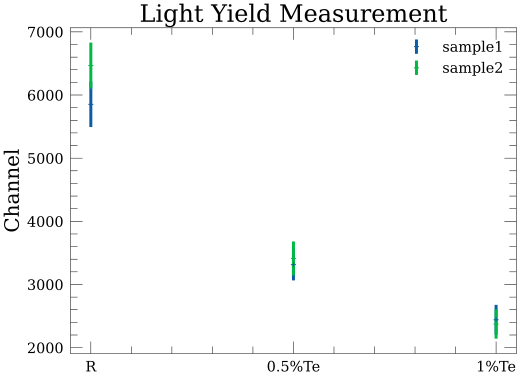

In [24]:
v_name = ["R", "0.5%Te", "1%Te"]
dict_plot_mean = {"sample1":np.zeros(len(v_name)), "sample2":np.zeros(len(v_name))}
dict_plot_sigma = {"sample1":np.zeros(len(v_name)), "sample2":np.zeros(len(v_name))}
for key in dict_mean.keys():
    for j,name in enumerate(v_name):
        if name in key:
            for name_sample in dict_plot_mean.keys():
                if name_sample in key:
                    dict_plot_mean[name_sample][j] = dict_mean[key]
                    dict_plot_sigma[name_sample][j] = dict_sigma[key]
for key in dict_plot_mean.keys():
    y_mean = dict_plot_mean[key]
    plt.errorbar(range(len(v_name)), y_mean, yerr=dict_plot_sigma[key], label=key,marker="+",markersize=5, ls="none")
plt.xticks(range(len(v_name)), v_name)
plt.legend()
plt.ylabel("Channel")
plt.title("Light Yield Measurement")
print(dict_plot_mean, dict_plot_sigma)